In [372]:
import pandas as pd
import numpy as np

In [373]:
# Here is the data, I want to split the times into another column for each dataset, then I want to groupby BD, Sys Name and see the average time for each dataset:
# nd:
# BD	Sys Name	Feed Name 	Arrival Time 	Start Time	Ingest End Time 
# 2025-06-03	1cud	cb_ben	2025-6-3 5:16:39 AM	2025-6-3 5:17:46 AM	2025-6-3 5:22:49 AM
# 2025-06-03	1cud	cb_ben	2025-6-3 6:00:46 AM	2025-6-3 6:01:23 AM	2025-6-3 6:08:59 AM
# 2025-06-03	1cud	cb_ben	2025-6-3 7:00:49 AM	2025-6-3 7:01:17 AM	2025-6-3 7:11:46 AM
# 2025-06-03	1cud	cb_ben	2025-6-3 5:16:39 AM	2025-6-3 5:17:27 AM	2025-6-3 6:09:05 AM
# 2025-06-03	1gcf	gb_fe	2025-6-3 12:00:24 AM	2025-6-3 12:06:38 AM	2025-6-3 12:10:13 PM
# 2025-06-03	1gcf	gb_fe			
# 2025-06-03	1gcf	gb_fe	2025-6-3 12:05:24 AM	2025-6-3 12:08:38 AM	2025-6-3 12:10:13 PM
# 2025-06-03	1gcf	rem_mg	2025-6-3 12:06:24 AM	2025-6-3 12:07:38 AM	2025-6-3 12:08:13 PM
# 2025-06-03	1gcf	rem_mg	2025-6-3 12:10:24 AM	2025-6-3 12:12:38 AM	2025-6-3 12:15:13 PM

# cur:
# BD	Data Source	Schema	Complete time 
# 2025-06-03	1cud	cb_ben	2025-6-3 8:09:51 PM
# 2025-06-03	1cud	cb_ben	2025-6-3 8:15:55 PM
# 2025-06-03	1cud	cb_ben	2025-6-3 8:16:00 PM
# 2025-06-03	1cud	cb_ben	2025-6-4 8:19:00 PM
# 2025-06-03	1gcf	gb_fe	2025-6-4 10:19:00 PM
# 2025-06-03	1gcf	gb_fe	2025-6-4 10:20:00 PM
# 2025-06-03	1gcf	gb_fe	2025-6-4 10:24:00 PM
# 2025-06-03	1gcf	rem_mg	2025-6-4 7:20:00 PM
# 2025-06-03	1gcf	rem_mg	2025-6-4 7:25:00 PM

# Dis:
# BD	DAPP	Feed Name 	Delivery Time
# 2025-06-03	1cud	cb_ben	2025-6-3 8:15:51 PM
# 2025-06-03	1cud	cb_ben	2025-6-3 8:20:55 PM
# 2025-06-03	1cud	cb_ben	2025-6-3 8:20:00 PM
# 2025-06-03	1cud	cb_ben	2025-6-4 8:25:00 PM
# 2025-06-03	1gcf	gb_fe	2025-6-4 10:25:00 PM
# 2025-06-03	1gcf	gb_fe	2025-6-4 10:40:00 PM
# 2025-06-03	1gcf	gb_fe	2025-6-4 10:40:00 PM
# 2025-06-03	1gcf	rem_mg	2025-6-4 9:20:00 PM
# 2025-06-03	1gcf	rem_mg	2025-6-4 9:25:00 PM

In [374]:
ind_df = pd.read_excel('PBI_DTA.xlsx', sheet_name= 'ind')
cur_df = pd.read_excel('PBI_DTA.xlsx', sheet_name= 'Cur')
dis_df = pd.read_excel('PBI_DTA.xlsx', sheet_name= 'Dis')

In [375]:
ind_df['Arrival Time Date'] = ind_df['Arrival Time'].dt.date
ind_df['Arrival Time Time'] = ind_df['Arrival Time'].dt.strftime('%H:%M:%S')

ind_df['Start Time Date'] = ind_df['Start Time'].dt.date
ind_df['Start Time Time'] = ind_df['Start Time'].dt.strftime('%H:%M:%S')

ind_df['Ingest End Time Date'] = ind_df['Ingest End Time'].dt.date
ind_df['Ingest End Time Time'] = ind_df['Ingest End Time'].dt.strftime('%H:%M:%S')

ind_df = ind_df[['BD','Sys Name','Arrival Time Time','Start Time Time','Ingest End Time Time']]
ind_df['Data Zone'] = 'IND'


In [376]:
cur_df['Cur End Time Date'] = cur_df['Complete time'].dt.date
cur_df['Cur Complete time'] = cur_df['Complete time'].dt.strftime('%H:%M:%S')
cur_df = cur_df[['BD','Data Source','Cur Complete time']]
cur_df['Data Zone'] = 'Cur'

In [377]:
dis_df['Dis End Time Date'] = dis_df['Delivery Time'].dt.date
dis_df['Dis Delivery Time'] = dis_df['Delivery Time'].dt.strftime('%H:%M:%S')
dis_df = dis_df[['BD','DAPP','Dis Delivery Time']]
dis_df['Data Zone'] = 'Dis'

In [378]:
import pandas as pd
from datetime import datetime

def avg_time_by_group(df, time_cols, group_col='Sys Name'):
    # Convert specified columns to timedelta
    for col in time_cols:
        df[col] = pd.to_timedelta(df[col])

    # Group by the group_col and calculate average of time columns
    avg_df = df.groupby(group_col)[time_cols].mean().reset_index()

    # Helper function to convert timedelta to 12-hour AM/PM string
    def format_to_ampm(tdelta):
        if pd.isnull(tdelta):
            return None
        dt = (datetime.min + tdelta)
        return dt.strftime('%I:%M:%S %p')

    # Apply formatting to each time column
    for col in time_cols:
        avg_df[col] = avg_df[col].apply(format_to_ampm)

    return avg_df



In [379]:
ind_columns = ['Arrival Time Time', 'Start Time Time', 'Ingest End Time Time']
ind_avg = avg_time_by_group(ind_df, ind_columns, ['BD','Sys Name','Data Zone'])

In [380]:
cur_columns = ['Cur Complete time']
cur_avg = avg_time_by_group(cur_df, cur_columns, ['BD','Data Source','Data Zone']).rename(columns={'Data Source':'Sys Name'})


In [381]:
dis_columns =['Dis Delivery Time']
dis_avg = avg_time_by_group(dis_df, dis_columns, ['BD','DAPP','Data Zone']).rename(columns={'DAPP':'Sys Name'})

In [382]:
concat_avg = pd.concat([ind_avg, cur_avg,dis_avg])

In [383]:
# Melt the time columns
time_cols = ['Arrival Time Time', 'Start Time Time', 'Ingest End Time Time', 
             'Cur Complete time', 'Dis Delivery Time']

melted_df = pd.melt(concat_avg, 
                    id_vars=[col for col in concat_avg.columns if col not in time_cols],
                    value_vars=time_cols,
                    var_name='Time_Type',
                    value_name='Time_Value')

In [384]:
melted_df['Time_Rank'] = melted_df.groupby(['BD', 'Sys Name'])['Time_Value'].rank(method='first')
melted_df['Time_Value'] = pd.to_datetime(melted_df['Time_Value']).dt.strftime('%H:%M:%S')

C:\Users\NULL\AppData\Local\Temp\ipykernel_13168\1584948102.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  melted_df['Time_Value'] = pd.to_datetime(melted_df['Time_Value']).dt.strftime('%H:%M:%S')


In [385]:
final_data = melted_df.sort_values(by=['Sys Name','Time_Value']).dropna().reset_index(drop= True)

#final_data.to_excel('DDDD.xlsx', index= False)

In [ ]:
final_data

In [387]:
# # First, combine date and time columns properly
# df['BD_datetime'] = pd.to_datetime(df['BD_x'])

# # Convert time columns to datetime
# for col in time_columns:
#     df[f'{col}_datetime'] = pd.to_datetime(df['BD_x'].astype(str) + ' ' + df[col])

# # Stack all datetime columns
# datetime_cols = [f'{col}_datetime' for col in time_columns]
# stacked_times = df[datetime_cols].stack().reset_index()
# stacked_times.columns = ['row_id', 'time_type', 'datetime']
# stacked_times = stacked_times.sort_values('datetime')

C:\Users\NULL\AppData\Local\Temp\ipykernel_13168\1105801417.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df['BD_x'] + ' ' + df[col])
C:\Users\NULL\AppData\Local\Temp\ipykernel_13168\1105801417.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df['BD_x'] + ' ' + df[col])


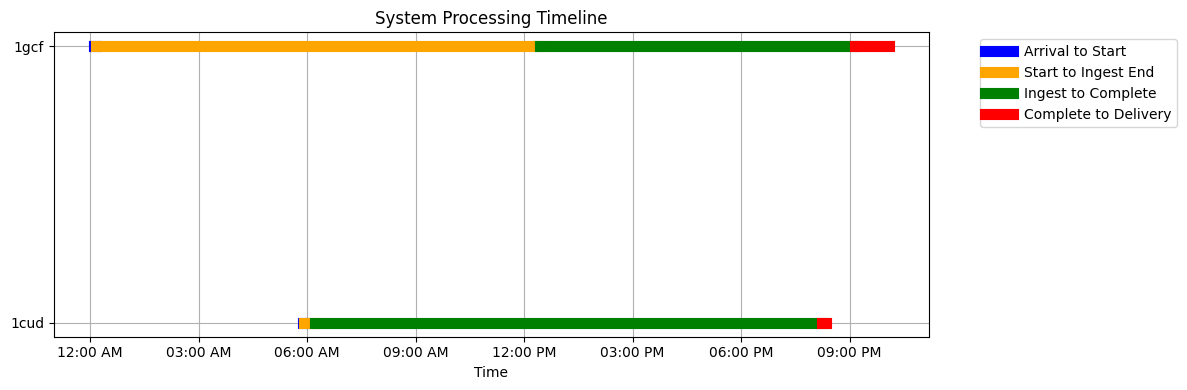

In [388]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Your data in a dictionary
data = {
    'Sys Name': ['1cud', '1gcf'],
    'Arrival Time': ['05:53:43 AM', '12:05:39 AM'],
    'Start Time': ['05:54:28 AM', '12:08:53 AM'],
    'Ingest End Time': ['06:13:09 AM', '12:25:58 PM'],
    'Cur Complete time': ['08:15:11 PM', '09:09:36 PM'],
    'Dis Delivery Time': ['08:20:26 PM', '10:06:00 PM'],
    'BD_x': ['2025-06-03', '2025-06-03']
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert times to datetime
for col in ['Arrival Time', 'Start Time', 'Ingest End Time', 'Cur Complete time', 'Dis Delivery Time']:
    df[col] = pd.to_datetime(df['BD_x'] + ' ' + df[col])

# Plot
fig, ax = plt.subplots(figsize=(12, 4))

for i, row in df.iterrows():
    y = i
    ax.plot([row['Arrival Time'], row['Start Time']], [y, y], label='Arrival to Start', color='blue', linewidth=8)
    ax.plot([row['Start Time'], row['Ingest End Time']], [y, y], label='Start to Ingest End', color='orange', linewidth=8)
    ax.plot([row['Ingest End Time'], row['Cur Complete time']], [y, y], label='Ingest to Complete', color='green', linewidth=8)
    ax.plot([row['Cur Complete time'], row['Dis Delivery Time']], [y, y], label='Complete to Delivery', color='red', linewidth=8)

ax.set_yticks(range(len(df)))
ax.set_yticklabels(df['Sys Name'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%I:%M %p'))
plt.xlabel('Time')
plt.title('System Processing Timeline')
plt.grid(True)

# Remove duplicate labels in legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [389]:
# for col in ['Arrival Time Time', 'Start Time Time', 'Ingest End Time Time']:
#     ind_df[col] = pd.to_timedelta(ind_df[col])

# # Group by BD and Sys Name and calculate mean for each time column
# result = ind_df.groupby(['BD', 'Sys Name']).agg({
#     'Arrival Time Time': 'mean',
#     'Start Time Time': 'mean',
#     'Ingest End Time Time': 'mean'
# }).reset_index()

# # Convert timedelta back to datetime.time and format as AM/PM string
# def format_timedelta_am_pm(td):
#     if pd.isnull(td):
#         return np.nan
#     # Add timedelta to midnight timestamp to get a datetime
#     dt = pd.Timestamp("00:00:00") + td
#     return dt.strftime('%I:%M:%S %p')  # e.g., "05:16:39 AM"

# for col in ['Arrival Time Time', 'Start Time Time', 'Ingest End Time Time']:
#     result[col] = result[col].apply(format_timedelta_am_pm)

In [390]:
import pandas as pd
import numpy as np
from datetime import datetime

# Sample data based on your format
data = {
    'BD': ['6/20/2025', '6/20/2025', '6/20/2025', '6/20/2025', '6/20/2025', '6/20/2025'],
    'Sys Name': ['1cud', '1gcf', '1cud', '1gcf', '1cud', '1gcf'],
    'Data Zone': ['IND', 'IND', 'Cur', 'Cur', 'Dis', 'Dis'],
    'Arrival Time': ['5:53:43 AM', '12:05:39 AM', 'NaN', 'NaN', 'NaN', 'NaN'],
    'Time Start Time': ['5:54:28 AM', '12:08:53 AM', 'NaN', 'NaN', 'NaN', 'NaN'],
    'Time Ingest End Time': ['6:13:09 AM', '12:25:58 PM', 'NaN', 'NaN', 'NaN', 'NaN'],
    'Cur Complete time': ['NaN', 'NaN', '8:15:11 PM', '9:09:36 PM', 'NaN', 'NaN'],
    'Dis Delivery Time': ['NaN', 'NaN', 'NaN', 'NaN', '8:20:26 PM', '10:06:00 PM']
}

# Create DataFrame
df = pd.DataFrame(data)

# Function to clean and convert time columns
def clean_time_column(df, col_name, date_col='BD'):
    """Convert time strings to datetime, handling NaN values"""
    # Replace 'NaN' strings with actual NaN
    df[col_name] = df[col_name].replace(['NaN', 'nan', ''], np.nan)
    
    # Create datetime by combining date and time for non-null values only
    mask = df[col_name].notna() & (df[col_name] != '')
    
    if mask.any():  # Only process if there are valid values
        df.loc[mask, col_name] = pd.to_datetime(
            df.loc[mask, date_col] + ' ' + df.loc[mask, col_name],
            errors='coerce'  # This will convert invalid dates to NaT
        )
    
    # Ensure the column is datetime type
    df[col_name] = pd.to_datetime(df[col_name], errors='coerce')
    return df

# Clean all time columns
time_columns = ['Arrival Time', 'Time Start Time', 'Time Ingest End Time', 
                'Cur Complete time', 'Dis Delivery Time']

for col in time_columns:
    df = clean_time_column(df, col)

# Convert BD to datetime
df['Date'] = pd.to_datetime(df['BD'])

print("Original Data After Time Conversion:")
print(df.head())
print("\n" + "="*50 + "\n")

# Transform data for Power BI - Calculate durations for each zone
def calculate_durations(df):
    """Calculate duration for each data zone"""
    df_transformed = df.copy()
    
    # Initialize duration column
    df_transformed['Duration_Minutes'] = np.nan
    
    # Calculate IND zone duration (Start Time - Arrival Time to Ingest End Time)
    ind_mask = df_transformed['Data Zone'] == 'IND'
    df_transformed.loc[ind_mask, 'Duration_Minutes'] = (
        df_transformed.loc[ind_mask, 'Time Ingest End Time'] - 
        df_transformed.loc[ind_mask, 'Arrival Time']
    ).dt.total_seconds() / 60
    
    # For Cur zone, we need to find the previous stage end time
    # This is more complex with the current data structure
    # For now, let's calculate available durations
    
    # Note: For Cur and Dis zones, we need additional logic to link stages
    # Since the data structure has separate rows per zone
    
    return df_transformed

# Apply duration calculation
df_with_duration = calculate_durations(df)

# Alternative approach: Reshape data for better Power BI compatibility
def reshape_for_powerbi(df):
    """Reshape data to have one row per system per date with all zone durations"""
    
    # Group by system and date
    systems = df.groupby(['Date', 'Sys Name'])
    
    result_rows = []
    
    for (date, sys_name), group in systems:
        row = {
            'Date': date,
            'Sys_Name': sys_name
        }
        
        # Get times for each zone
        for _, zone_row in group.iterrows():
            zone = zone_row['Data Zone']
            
            if zone == 'IND':
                row['IND_Arrival'] = zone_row['Arrival Time']
                row['IND_Start'] = zone_row['Time Start Time'] 
                row['IND_End'] = zone_row['Time Ingest End Time']
                
            elif zone == 'Cur':
                row['Cur_Complete'] = zone_row['Cur Complete time']
                
            elif zone == 'Dis':
                row['Dis_Delivery'] = zone_row['Dis Delivery Time']
        
        result_rows.append(row)
    
    return pd.DataFrame(result_rows)

# Reshape the data
df_reshaped = reshape_for_powerbi(df)

print("Reshaped Data (One row per system):")
print(df_reshaped)
print("\n" + "="*50 + "\n")

# Calculate durations in the reshaped format
def calculate_all_durations(df):
    """Calculate durations for all zones in reshaped format"""
    df_calc = df.copy()
    
    # IND Duration (minutes from arrival to ingest completion)
    # Only calculate if both times are available
    ind_mask = df_calc['IND_End'].notna() & df_calc['IND_Arrival'].notna()
    df_calc.loc[ind_mask, 'IND_Duration_Minutes'] = (
        df_calc.loc[ind_mask, 'IND_End'] - df_calc.loc[ind_mask, 'IND_Arrival']
    ).dt.total_seconds() / 60
    
    # Processing Duration (Start to End within IND)
    process_mask = df_calc['IND_End'].notna() & df_calc['IND_Start'].notna()
    df_calc.loc[process_mask, 'IND_Processing_Minutes'] = (
        df_calc.loc[process_mask, 'IND_End'] - df_calc.loc[process_mask, 'IND_Start']
    ).dt.total_seconds() / 60
    
    # For systems that have Cur Complete time, calculate time from IND end to Cur complete
    cur_mask = df_calc['Cur_Complete'].notna() & df_calc['IND_End'].notna()
    df_calc.loc[cur_mask, 'Cur_Duration_Minutes'] = (
        df_calc.loc[cur_mask, 'Cur_Complete'] - df_calc.loc[cur_mask, 'IND_End']
    ).dt.total_seconds() / 60
    
    # For systems that have Dis Delivery time, calculate time from Cur complete to Dis delivery
    dis_mask = df_calc['Dis_Delivery'].notna() & df_calc['Cur_Complete'].notna()
    df_calc.loc[dis_mask, 'Dis_Duration_Minutes'] = (
        df_calc.loc[dis_mask, 'Dis_Delivery'] - df_calc.loc[dis_mask, 'Cur_Complete']
    ).dt.total_seconds() / 60
    
    return df_calc

df_final = calculate_all_durations(df_reshaped)

print("Final Data with Durations:")
print(df_final)
print("\n" + "="*50 + "\n")

# Create final format for Power BI - Long format for better visualization
def create_powerbi_format(df):
    """Create long format suitable for Power BI charts"""
    
    # Find all duration columns
    duration_cols = [col for col in df.columns if 'Duration_Minutes' in col]
    
    if not duration_cols:
        print("No duration columns found")
        return df
    
    # Only include rows that have at least one duration value
    df_with_durations = df.dropna(subset=duration_cols, how='all').copy()
    
    df_long = pd.melt(
        df_with_durations, 
        id_vars=['Date', 'Sys_Name'],
        value_vars=duration_cols,
        var_name='Zone_Type',
        value_name='Duration_Minutes'
    )
    
    # Clean up zone names
    df_long['Zone'] = df_long['Zone_Type'].str.replace('_Duration_Minutes', '')
    
    # Remove rows with NaN durations
    df_long = df_long.dropna(subset=['Duration_Minutes'])
    
    # Remove negative durations (if any)
    df_long = df_long[df_long['Duration_Minutes'] >= 0]
    
    return df_long

df_powerbi = create_powerbi_format(df_final)

print("Power BI Ready Format:")
print(df_powerbi)

# Export to CSV for Power BI import
df_powerbi.to_csv('powerbi_data.csv', index=False)
df_final.to_csv('system_summary.csv', index=False)

print(f"\nFiles exported:")
print(f"- powerbi_data.csv: Long format for charts ({len(df_powerbi)} rows)")
print(f"- system_summary.csv: Wide format for detailed analysis ({len(df_final)} rows)")

# Summary statistics
print(f"\nData Summary:")
if len(df_powerbi) > 0:
    print(f"- Date range: {df_powerbi['Date'].min()} to {df_powerbi['Date'].max()}")
    print(f"- Systems: {df_powerbi['Sys_Name'].unique()}")
    print(f"- Zones available: {df_powerbi['Zone'].unique()}")
    
    # Calculate average durations for each zone
    zone_averages = df_powerbi.groupby('Zone')['Duration_Minutes'].mean()
    print("- Average durations by zone:")
    for zone, avg_duration in zone_averages.items():
        print(f"  - {zone}: {avg_duration:.1f} minutes")
else:
    print("- No data available for summary")

Original Data After Time Conversion:
          BD Sys Name Data Zone        Arrival Time     Time Start Time  \
0  6/20/2025     1cud       IND 2025-06-20 05:53:43 2025-06-20 05:54:28   
1  6/20/2025     1gcf       IND 2025-06-20 00:05:39 2025-06-20 00:08:53   
2  6/20/2025     1cud       Cur                 NaT                 NaT   
3  6/20/2025     1gcf       Cur                 NaT                 NaT   
4  6/20/2025     1cud       Dis                 NaT                 NaT   

  Time Ingest End Time   Cur Complete time   Dis Delivery Time       Date  
0  2025-06-20 06:13:09                 NaT                 NaT 2025-06-20  
1  2025-06-20 12:25:58                 NaT                 NaT 2025-06-20  
2                  NaT 2025-06-20 20:15:11                 NaT 2025-06-20  
3                  NaT 2025-06-20 21:09:36                 NaT 2025-06-20  
4                  NaT                 NaT 2025-06-20 20:20:26 2025-06-20  


Reshaped Data (One row per system):
        Date Sys_N

C:\Users\NULL\AppData\Local\Temp\ipykernel_13168\1787681568.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.loc[mask, col_name] = pd.to_datetime(
C:\Users\NULL\AppData\Local\Temp\ipykernel_13168\1787681568.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.loc[mask, col_name] = pd.to_datetime(
